In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style='white', font_scale=1.3)


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import importlib
import HATA2_v5 as hata
import HATA_v4 as hata_pre
importlib.reload(hata)
importlib.reload(hata_pre)

<module 'HATA_v4' from '/home/benny/Workspaces/bridge_bond/HATA/notes/sample/HATA_v4.py'>

In [4]:
pos = {
     0: np.array([-0.4703862 , -0.34489328]),
     1: np.array([ 0.40357603, -0.75529649]),
     2: np.array([-0.08569073, -0.01218594]),
     3: np.array([ 0.57099165, -0.09285646]), #np.array([ 0.57099165, -0.46346923]),
     4: np.array([0.24036975, -0.10285646]),
     5: np.array([-0.04527947, -0.81240998]),
     6: np.array([0.3388763 , 0.68574299]),
     7: np.array([-0.04654207,  1.        ]),
     8: np.array([-0.73426707,  0.30742817]),
     9: np.array([-0.27164818,  0.30222731]), 
    10: np.array([-0.6, 0.9]),
    11: np.array([-0.75, -0.7]),
}

In [5]:
lab_pos = {
 0: np.array([-0.5203861968022094, -0.34489328]),
 1: np.array([0.35357603138776517, -0.8052964860501227]),
 2: np.array([-0.13569073076563426, -0.06218594410604387]),
 3: np.array([0.62099165, -0.14285646]), #[0.520991645284546, -0.5134692342035163],
 4: np.array([0.29036975, -0.05285646]), #[0.2903697506759813, 0.042856461263042114],
 5: np.array([-0.09527947239492962, -0.8624099846632357]),
 6: np.array([0.28887629565447687, 0.6357429948931298]),
 7: np.array([0.003457933662384602, 1.05]), #[-0.0965420663376154, 0.95],
 8: np.array([-0.7842670732612133, 0.25742816832033305]),
 9: np.array([-0.32164818344117274, 0.25222730650611364]), 
10: np.array([-0.65, 0.95]),
11: np.array([-0.80, -0.75]),
}

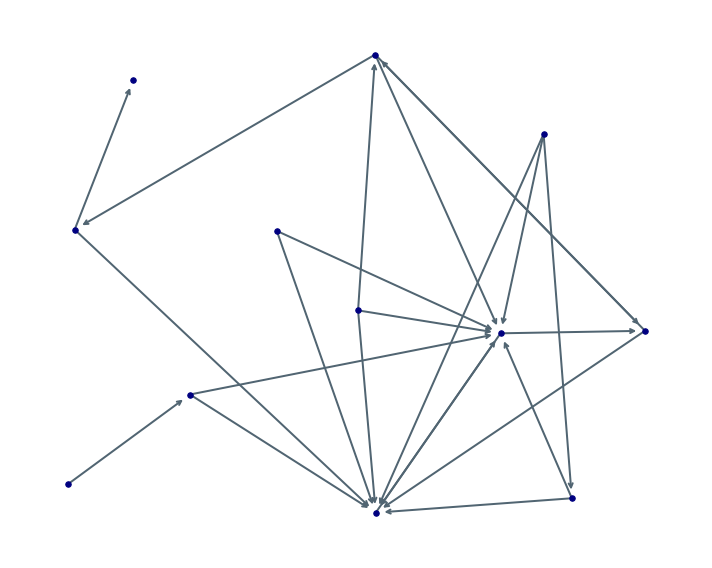

In [6]:
G2 = nx.DiGraph()
G2.add_edges_from([
    (0, 4), (0, 5), 
    (1, 4), (1, 5), 
    (2, 5), (2, 4), (2, 7), 
    (3, 5), (3, 7), 
    (4, 4), (4, 5), (4, 3), 
    (5, 5), (5, 4), 
    (6, 1), (6, 4), (6, 5), 
    (7, 8), (7, 3), (7, 7), (7, 4), 
    (8, 5), (8, 10), 
    (9, 5), (9, 4), 
    (11, 0)
])
fig, ax = plt.subplots(figsize=(10,8))

nx.draw_networkx_nodes(G2, pos, node_size=30, node_color='navy', ax=ax)
edges = nx.draw_networkx_edges(G2, pos, arrowstyle='->',
                               arrowsize=10, edge_color='xkcd:slate',
                               edge_cmap=plt.cm.Blues, width=2, ax=ax)
ax.set_axis_off()
plt.tight_layout()

In [7]:
G2.number_of_nodes(), G2.number_of_edges()

(12, 26)

In [8]:
G2.nodes()

NodeView((0, 4, 5, 1, 2, 7, 3, 6, 8, 10, 9, 11))

In [9]:
G2.edges(data=False)

OutEdgeView([(0, 4), (0, 5), (4, 4), (4, 5), (4, 3), (5, 5), (5, 4), (1, 4), (1, 5), (2, 5), (2, 4), (2, 7), (7, 8), (7, 3), (7, 7), (7, 4), (3, 5), (3, 7), (6, 1), (6, 4), (6, 5), (8, 5), (8, 10), (9, 5), (9, 4), (11, 0)])

calculating common neighbor: 100%|██████████| 26/26 [00:00<00:00, 5032.16it/s]

no_nodes: 12 , no_arcs: 26
completed randomizing 0 approx. used time:  5.91119130452474e-05 mins for about 10 iter.
completed randomizing 10 approx. used time:  0.0005188465118408203 mins for about 10 iter.
completed randomizing 20 approx. used time:  0.0004996657371520996 mins for about 10 iter.
completed randomizing 30 approx. used time:  0.0005218187967936198 mins for about 10 iter.
completed randomizing 40 approx. used time:  0.0005184491475423177 mins for about 10 iter.


completed randomizing 50 approx. used time:  0.0005795677502950032 mins for about 10 iter.
completed randomizing 60 approx. used time:  0.0005322416623433431 mins for about 10 iter.
completed randomizing 70 approx. used time:  0.0006022890408833822 mins for about 10 iter.
completed randomizing 80 approx. used time:  0.0007893721262613933 mins for about 10 iter.
completed randomizing 90 approx. used time:  0.0008335908253987631 mins for about 10 iter.
completed randomizing 100 approx. used time:  0.0006957769393920899 mins for about 10 iter.
completed randomizing 110 approx. used time:  0.0008775234222412109 mins for about 10 iter.
completed randomizing 120 approx. used time:  0.0005131999651590984 mins for about 10 iter.
completed randomizing 130 approx. used time:  0.00045349995295206703 mins for about 10 iter.
completed randomizing 140 approx. used time:  0.0005041360855102539 mins for about 10 iter.
completed randomizing 150 approx. used time:  0.0005194306373596192 mins for about 1

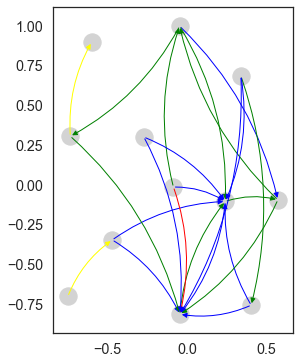

In [13]:
dg2, ext_dic, int_dic = hata.bridge_or_bond(G2, times=1000,
                                        external=None,  threads=4,
                                        run_silent=True, output_random_res=False)
print(ext_dic)
hata.draw_net(dg2, pos=pos)

Calculating average shortest path length: 100%|██████████| 1000/1000 [00:00<00:00, 10304.20it/s]

no_nodes: 12 , no_arcs: 26
completed randomizing 0 approx. used time:  2.8355916341145834e-05 mins for about 10 iter.
completed randomizing 10 approx. used time:  0.00025298992792765297 mins for about 10 iter.
completed randomizing 20 approx. used time:  0.00022243261337280275 mins for about 10 iter.
completed randomizing 30 approx. used time:  0.00020924011866251628 mins for about 10 iter.
completed randomizing 40 approx. used time:  0.00019199848175048827 mins for about 10 iter.
completed randomizing 50 approx. used time:  0.000175631046295166 mins for about 10 iter.
completed randomizing 60 approx. used time:  0.00016748905181884766 mins for about 10 iter.
completed randomizing 70 approx. used time:  0.0001598477363586426 mins for about 10 iter.


completed randomizing 80 approx. used time:  0.00028828779856363934 mins for about 10 iter.
completed randomizing 90 approx. used time:  0.0002898693084716797 mins for about 10 iter.
randomizing used time: 0.0022848725318908693
{'1': 0.8149124522228888}


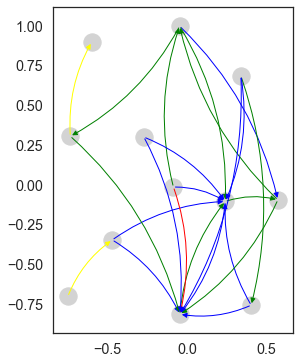

In [17]:
dg2, ext_dic, int_dic = hata_pre.bridge_or_bond(G2, times=100,
                                        external=None,  threads=4,
                                        run_silent=True, output_random_res=False)
print(ext_dic)
hata.draw_net(dg2, pos=pos)

In [18]:
ext_dic, int_dic

({'1': 0.8149124522228888}, {'1': 0.0})

In [19]:
ecolor = []
for u,v,d in dg2.edges(data=True):
    if 'Bond' in d['type']:
        ecolor.append('xkcd:iris')
    elif 'Global' in d['type']:
        ecolor.append('xkcd:bluey green')
    elif 'Local' in d['type']:
        ecolor.append('xkcd:deep rose')
    else:
        ecolor.append('xkcd:wheat')

nlabels = 'abcdefghijkl'
nlabels = list(nlabels)
nlabels = {n: nlabels[n] for n in dg2.nodes()}

# Figure 5

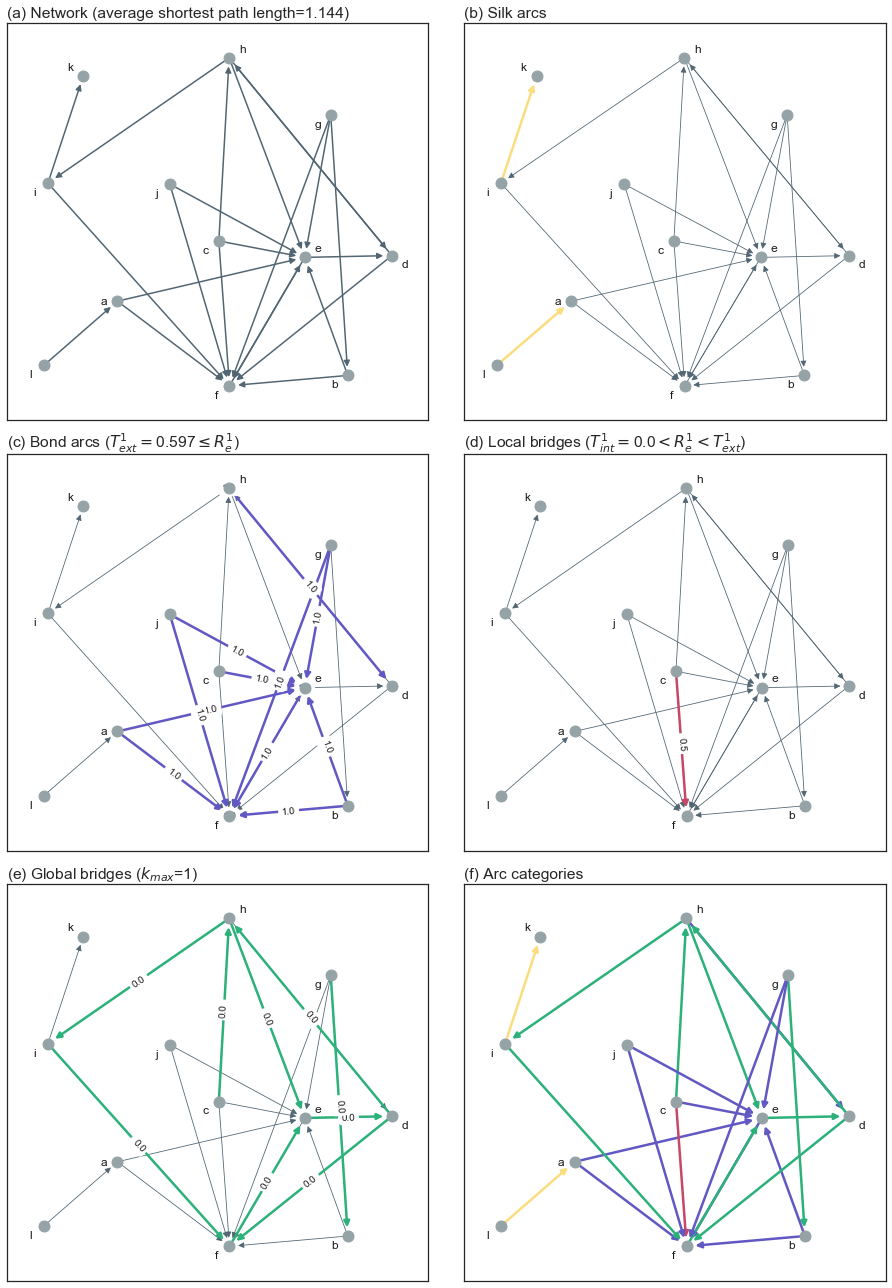

In [21]:
fig, axg = plt.subplots(3, 2, figsize=(12.5, 18))
axs = axg.flatten()
labs2 = []


## a
char = nx.average_shortest_path_length(G2)
labs2.append('Network (average shortest path length={:.3f})'.format(char))
nx.draw_networkx_edges(dg2, pos, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:slate', width=1.5, ax=axs[0])

## b
labs2.append('Silk arcs')
eset = []
eset2 = []
for u,v,d in dg2.edges(data=True):
    if not('Silk' in d['type']):
        eset.append((u,v))
    else:
        eset2.append((u,v))
nx.draw_networkx_edges(dg2, pos, edgelist=eset, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:slate', width=0.8, ax=axs[1])
nx.draw_networkx_edges(dg2, pos, edgelist=eset2, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:wheat', width=2.5, ax=axs[1])

## c
#labs2.append('Bond arcs ('+r'$T_{ext}^1=$'+'{:.3f}'.format(ext_dic['1']) + r'$\leq R_e^1$'+')')
labs2.append('Bond arcs ('+r'$T_{ext}^1=$'+'{:.3f}'.format(0.597) + r'$\leq R_e^1$'+')')
eset = []
eset2 = []
eset2_lab = {}
for u,v,d in dg2.edges(data=True):
    if not('Bond' in d['type']):
        eset.append((u,v))
    else:
        eset2.append((u,v))
        eset2_lab[(u,v)] = d['w1a']
nx.draw_networkx_edges(dg2, pos, edgelist=eset, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:slate', width=0.8, ax=axs[2])
nx.draw_networkx_edges(dg2, pos, edgelist=eset2, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:iris', width=2.5, ax=axs[2])
nx.draw_networkx_edge_labels(dg2, pos, edgelist=eset2, edge_labels=eset2_lab, ax=axs[2])


## d
labs2.append('Local bridges ('+r'$T_{int}^1=$'+'{:.1f}'.format(0.0) + r'$< R_e^1 <T_{ext}^1$'+')')
eset = []
eset2 = []
eset2_lab = {}
for u,v,d in dg2.edges(data=True):
    if not('Local' in d['type']):
        eset.append((u,v))
    else:
        eset2.append((u,v))
        eset2_lab[(u,v)] = d['w1a']
nx.draw_networkx_edges(dg2, pos, edgelist=eset, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:slate', width=0.8, ax=axs[3])
nx.draw_networkx_edges(dg2, pos, edgelist=eset2, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:deep rose', width=2.5, ax=axs[3])
nx.draw_networkx_edge_labels(dg2, pos, edgelist=eset2, edge_labels=eset2_lab, ax=axs[3])


## e
labs2.append('Global bridges ('+r'$k_{max}$'+'={})'.format('1'))
eset = []
eset2 = []
eset2_lab = {}
for u,v,d in dg2.edges(data=True):
    if not('Global' in d['type']):
        eset.append((u,v))
    else:
        eset2.append((u,v))
        eset2_lab[(u,v)] = float(d['w1a'])
nx.draw_networkx_edges(dg2, pos, edgelist=eset, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:slate', width=0.8, ax=axs[4])
nx.draw_networkx_edges(dg2, pos, edgelist=eset2, arrowstyle='-|>', arrowsize=12, 
                               edge_color='xkcd:bluey green', width=2.5, ax=axs[4])
nx.draw_networkx_edge_labels(dg2, pos, edgelist=eset2, edge_labels=eset2_lab, ax=axs[4])


## f
labs2.append('Arc categories')
nx.draw_networkx_edges(dg2, pos, arrowstyle='-|>', arrowsize=12, 
                               edge_color=ecolor, width=2.5, ax=axs[5])


labs = 'abcdef'
i = 0
for ax in axs:
    nx.draw_networkx_nodes(dg2, pos, node_size=[120], node_color='xkcd:cool gray', ax=ax)
    nx.draw_networkx_labels(dg2, lab_pos, labels=nlabels, ax=ax)
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left')
    #ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    i+=1
plt.tight_layout()
plt.savefig( 'small_demo_network_rev1.eps', format="eps", dpi=120, bbox_inches='tight' )